# SISTEMAS DE DETECCION DE INTRUSIONES BASADO EN MODELOS DE INTELIGENCIA ARTIFICIAL EXPLICATIVA 
   
 Autor: Jose Hernandez Segura 
 Tutor: Xavier Larriva Novo 
 
 La idea de este proyecto es probar y comparar un total de 6 modelos de Machine Learning sobre el dataset CICIDS 2017 Dataset (https://www.unb.ca/cic/datasets/ids-2017.html): 
    
    
   - Support Vector Machine (SVM)
   - Decision Tree
   - Naive Bayes
   - K Means Clustering 
   - K Nearest Neighbours,
   - Random Forest
   
Primero de todo investigará y preparará el dataset, comprobando que no haya valores nulos y que todo sea correcto. A continuación se realizara una selección de las caracteristicas más importantes haciendo un filtrado. En ese punto todo estará listo para comenzar a entrenar los 6 modelos y extraer las pertinentes metricas. Finalmente se aplicará un explainer.
   

## Imports

In [7]:
# librerias requeridas para el proyecto, es posible que más abajo se incluya alguna librería extra
import warnings
warnings.filterwarnings("ignore")
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import time
import shap 
import lime
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support


from sklearn.model_selection import train_test_split

In [8]:
dataset=pd.read_csv('./CICIDS2017_sampled.csv')

In [9]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min",
             "Attack",
             "Label"
            ]

In [10]:
# Assign the column names
dataset.columns = col_names

In [11]:
# 3 Different labeling options
attacks = ['Label', 'Attack']

# xs=feature vectors, ys=labels
xs = dataset.drop(attacks, axis=1)
ys = dataset[['Label']]

x_train, x_test, y_train, y_test = train_test_split(xs,ys, train_size = 0.8, test_size = 0.2)

## Eliminamos características con valores únicos

In [12]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['Bwd_PSH_Flags',
 'Bwd_URG_Flags',
 'Fwd_Avg_Bytes_Bulk',
 'Fwd_Avg_Packets_Bulk',
 'Fwd_Avg_Bulk_Rate',
 'Bwd_Avg_Bytes_Bulk',
 'Bwd_Avg_Packets_Bulk',
 'Bwd_Avg_Bulk_Rate']

In [13]:
x_train = x_train.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
dataset_copy = xs.drop(to_drop, axis=1)

## Normalización del dataset

In [14]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_test = min_max_scaler.transform(x_test)

# All values between 0 and 1
pd.Series(x_train.flatten()).describe()

count    3.334839e+06
mean     7.242555e-02
std      2.044790e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.958333e-06
75%      7.513706e-03
max      1.000000e+00
dtype: float64

## Seleccion de caracteristicas

In [15]:
features = SelectKBest(score_func=f_classif, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit_transform(x_train, y_train.Label)

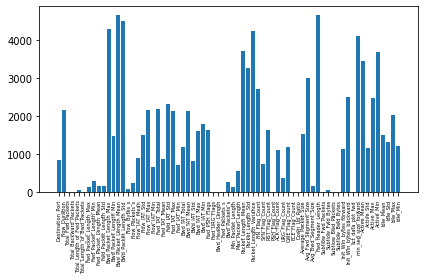

In [16]:
# plot the score associated with each feature
plt.bar([i for i in range(len(features.scores_))], features.scores_)
plt.xticks([i for i in range(len(features.scores_))], dataset_copy.columns)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.savefig('features.pdf', dpi=300, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

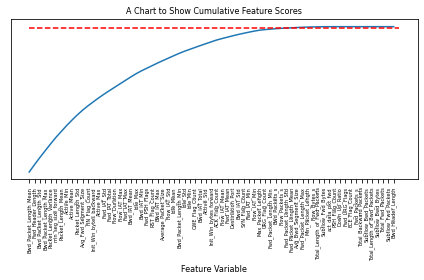

In [17]:
# sort the features by importance score
feature_importances = zip(dataset_copy.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
plt.tight_layout()
plt.savefig('cum_features.pdf', dpi=300)

In [18]:
# perform selectkbest with k=40
features = SelectKBest(score_func=f_classif, k=40)

In [19]:
fit = features.fit(x_train, y_train.Label)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)

In [20]:
new_features = dataset_copy.columns[features.get_support(indices=True)]

In [21]:
new_features

Index(['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std',
       'Flow_IAT_Max', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'RST_Flag_Count', 'ACK_Flag_Count', 'CWE_Flag_Count',
       'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Fwd_Header_Length',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active_Mean', 'Active_Std', 'Active_Max',
       'Active_Min', 'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min'],
      dtype='object')

In [22]:
features= np.array(['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std',
       'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total',
       'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min',
       'Fwd_PSH_Flags', 'Bwd_Packets_s', 'Min_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'CWE_Flag_Count', 'Avg_Fwd_Segment_Size',
       'Fwd_Header_Length', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Idle_Mean', 'Idle_Std', 'Idle_Max',
       'Idle_Min'])

In [23]:
attack = np.array(['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                   'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'XSS'])

# 1. SVC

In [99]:
classifier = LinearSVC()

## Multiclase completo

In [100]:
# fit the model
svc1 = classifier.fit(x_train, y_train)

In [101]:
svc1_score=svc1.score(x_test,y_test)
y_predict=svc1.predict(x_test)
y_true=y_test
print('Accuracy of SVM: '+ str(svc1_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of SVM: '+(str(precision)))
print('Recall of SVM: '+(str(recall)))
print('F1-score of SVM: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'Attack': attack, 'Precision': precision, 'Recall' : recall, 'f1score': fscore}
results = pd.DataFrame(data=d)
results


Accuracy of SVM: 0.8864520400562774
Precision of SVM: 0.8813381365831275
Recall of SVM: 0.8864520400562774
F1-score of SVM: 0.8795285144220545


,attack,precision,recall,fscore
0,BENIGN,0.891298,0.893105,0.892201
1,Bot,0.629091,0.415865,0.500724
2,Brute Force,0.959016,0.622340,0.754839
3,DDoS,0.976051,0.976051,0.976051
4,DoS GoldenEye,0.941441,0.620178,0.747764
5,DoS Hulk,0.947129,0.925200,0.936036
6,DoS Slowhttptest,0.907882,0.826990,0.865550
7,DoS slowloris,0.888322,0.995553,0.938886
8,FTP-Patator,0.573604,0.911290,0.704050
9,PortScan,0.887739,0.986726,0.934619


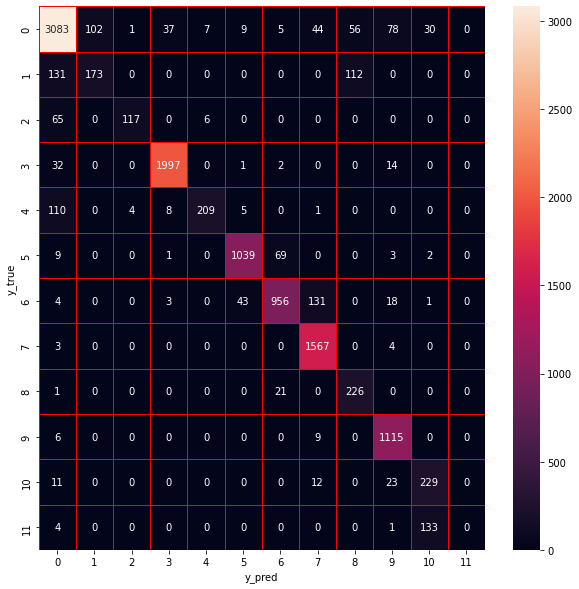

In [102]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# 2. Decision Tree

In [26]:
dt = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 47, min_samples_split = 3, max_features = 19, criterion = 'gini')

## Multiclase completo

In [27]:
DT=dt.fit(x_train,y_train)


In [142]:
dt_score=dt.score(x_test,y_test)
y_predict=dt.predict(x_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results


Accuracy of DT: 0.98311677563519
Precision of DT: 0.982199728893746
Recall of DT: 0.98311677563519
F1-score of DT: 0.982378341048324


,attack,precision,recall,fscore
0,BENIGN,0.991334,0.994206,0.992768
1,Bot,0.995169,0.990385,0.992771
2,Brute Force,0.994681,0.994681,0.994681
3,DDoS,0.996580,0.997067,0.996824
4,DoS GoldenEye,0.982301,0.988131,0.985207
5,DoS Hulk,0.991111,0.992876,0.991993
6,DoS Slowhttptest,0.995660,0.992215,0.993934
7,DoS slowloris,1.000000,0.998094,0.999046
8,FTP-Patator,0.991837,0.979839,0.985801
9,PortScan,1.000000,0.999115,0.999557


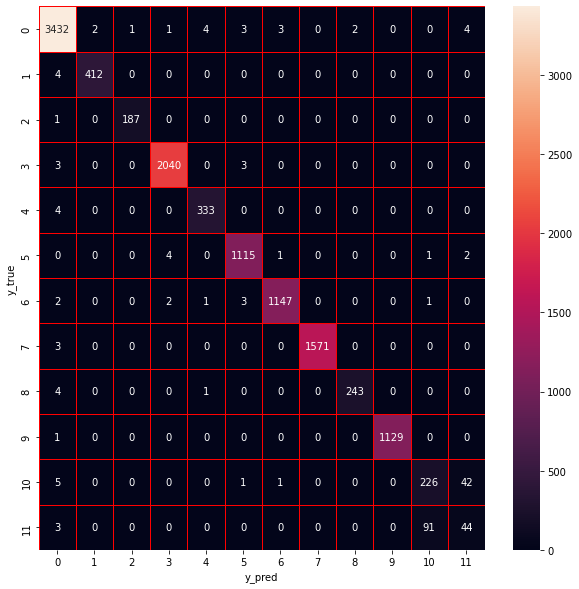

In [143]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [144]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 0.9903846153846154
Accuracy of SVM: 0.0005824111822947398


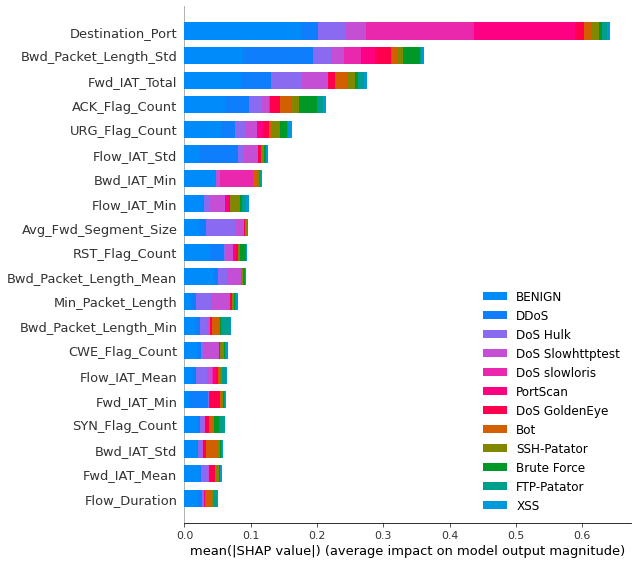

In [28]:
shap.initjs()
explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation
shap.summary_plot(shap_values, pd.DataFrame(x_train), feature_names= features, class_names= attack)

In [29]:
from lime import lime_tabular
import random
explainer = lime_tabular.LimeTabularExplainer(x_train, mode="classification",
                                              feature_names=features, class_names=attack)
idx = random.randint(1, len(x_train))
explanation = explainer.explain_instance(x_train[idx], DT.predict_proba, top_labels=11)

explanation.show_in_notebook(show_table=True, show_all=False)

# 3. Native Bayes

In [161]:
mnb = MultinomialNB()

## Multiclase completo

In [162]:
MNB=mnb.fit(x_train,y_train)

In [164]:
mnb_score=mnb.score(x_test,y_test)
y_predict=mnb.predict(x_test)
y_true=y_test
print('Accuracy of DT: '+ str(mnb_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

Accuracy of DT: 0.6029959447157163
Precision of DT: 0.602502518756494
Recall of DT: 0.6029959447157163
F1-score of DT: 0.573864884034519


,attack,precision,recall,fscore
0,BENIGN,0.466034,0.824739,0.595544
1,Bot,0.000000,0.000000,0.000000
2,Brute Force,1.000000,0.005319,0.010582
3,DDoS,0.817267,0.754154,0.784443
4,DoS GoldenEye,0.800781,0.608309,0.691400
5,DoS Hulk,0.807654,0.714159,0.758034
6,DoS Slowhttptest,0.552507,0.505190,0.527790
7,DoS slowloris,0.758517,0.480940,0.588647
8,FTP-Patator,0.000000,0.000000,0.000000
9,PortScan,0.709468,0.484071,0.575487


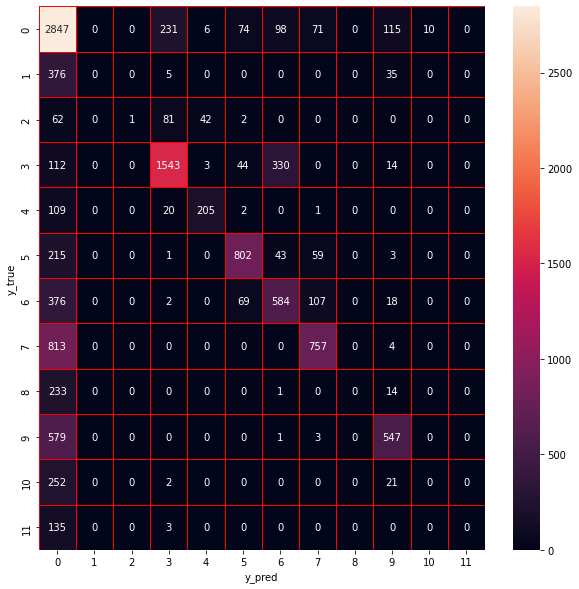

In [165]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# 4. K Nearest Neighbours

## Multiclase completo

In [30]:
# fit model
knn = KNeighborsClassifier(n_neighbors = 7)

In [31]:
KNN=knn.fit(x_train,y_train)

In [32]:
knn_score=knn.score(x_test,y_test)
y_predict=knn.predict(x_test)
y_true=y_test
print('Accuracy of KNN: '+ str(knn_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of KNN: '+(str(precision)))
print('Recall of KNN: '+(str(recall)))
print('F1-score of KNN: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

Accuracy of KNN: 0.9765786642390135
Precision of KNN: 0.9764094120573784
Recall of KNN: 0.9765786642390135
F1-score of KNN: 0.9761059841975954


,attack,precision,recall,fscore
0,BENIGN,0.996109,0.970262,0.983016
1,Bot,0.962353,0.995134,0.978469
2,Brute Force,0.965318,0.970930,0.968116
3,DDoS,0.989563,0.998996,0.994257
4,DoS GoldenEye,0.981030,0.989071,0.985034
5,DoS Hulk,0.986201,0.988018,0.987109
6,DoS Slowhttptest,0.989796,0.989796,0.989796
7,DoS slowloris,0.998737,0.998107,0.998422
8,FTP-Patator,0.848765,0.978648,0.909091
9,PortScan,0.995752,0.995752,0.995752


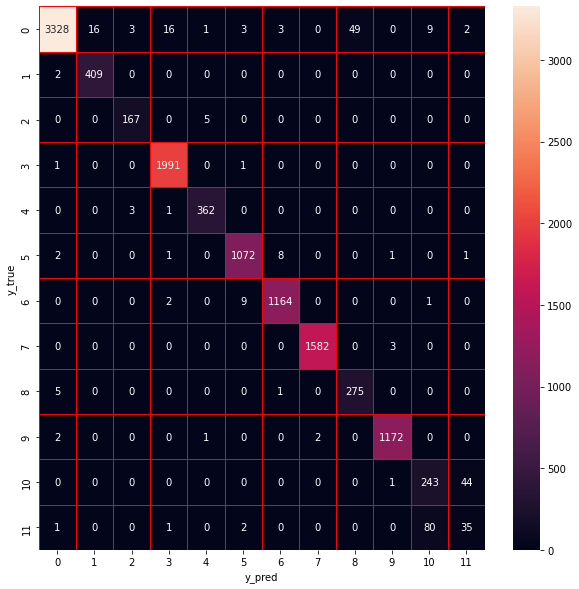

In [33]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [34]:
TN = cm[0, 0]
FP = cm[0, 6]
FN = cm[6, 0]
TP = cm[6, 6]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 1.0
Accuracy of SVM: 0.0009006304413089472


In [37]:
f = lambda x: KNN.predict_proba(x)[:,1]
med = pd.DataFrame(x_train).median().values.reshape((1,pd.DataFrame(x_train).shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values = explainer.shap_values(pd.DataFrame(x_train).iloc[0:100,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values, pd.DataFrame(x_train).iloc[0:100,:],feature_names=features)


  0%|          | 0/100 [00:00<?, ?it/s]

# 5. K Means Cluster

In [124]:
colors = ['gray', 'lime', 'yellow', 'red', 
          'purple', 'black', 'blue', 'green',
         'orangered', 'pink', 'cyan', 'maroon']

## Multiclase gráfica distribución dataset

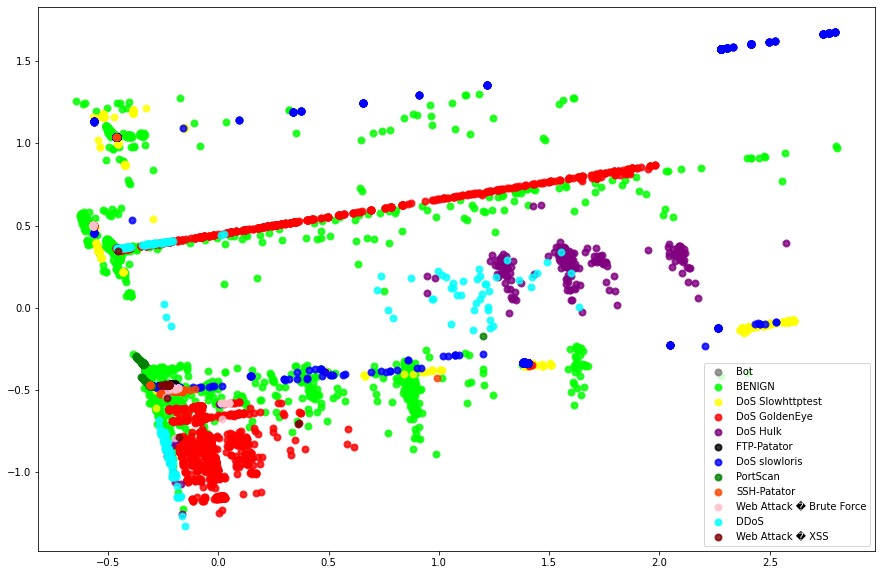

In [125]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_test_pca_cont = pca.fit_transform(x_test)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_test.Label.unique()):
    plt.scatter(x_test_pca_cont[y_test.Label == l, 0],
                x_test_pca_cont[y_test.Label == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

## Multiclase completo, predicción 

0.7619619369506836 0.03390955924987793


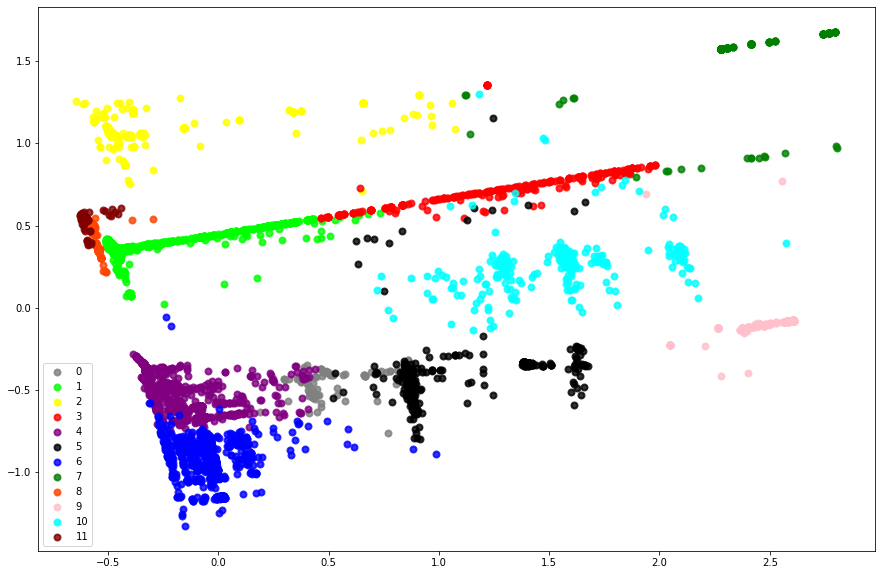

Predicted,0,1,2,3,4,5,6,7,8,9,10,11
Actual,,,,,,,,,,,,
BENIGN,44,1904,194,30,598,228,37,21,114,4,16,262
Bot,1,7,0,0,258,0,2,0,51,0,0,97
DDoS,0,65,0,0,0,0,80,0,0,0,43,0
DoS GoldenEye,2,281,0,255,435,2,1057,0,14,0,0,0
DoS Hulk,0,109,0,2,1,0,20,0,0,0,205,0
DoS Slowhttptest,610,14,174,0,39,37,0,0,51,198,0,0
DoS slowloris,26,2,153,8,378,336,1,200,19,33,0,0
FTP-Patator,0,3,757,0,810,0,0,0,4,0,0,0
PortScan,0,0,0,0,247,1,0,0,0,0,0,0


In [126]:
#fit
start = time.time()
kmeans = KMeans(n_clusters = 12, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = kmeans.predict(x_test)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# plot pca graph
x_test_pca_cont = pca.fit_transform(x_test)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_test_pca_cont[y_predicted == l, 0],
                x_test_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

# cross tabulate to show actual groupings & clusters predicted
cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_test.Label})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

# 6. Random Forest

In [128]:
rf =  RandomForestClassifier()

## Multiclase completo

In [157]:
RF=rf.fit(x_train, y_train.Label)


In [158]:
rf_score=RF.score(x_test,y_test)
y_predict=rf.predict(x_test)
y_true=y_test
print('Accuracy of RF: '+ str(knn_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

Accuracy of RF: 0.974840685260283
Precision of RF: 0.9837607113855787
Recall of RF: 0.9841099064801787
F1-score of RF: 0.9838559639781743


,attack,precision,recall,fscore
0,BENIGN,0.994790,0.995655,0.995222
1,Bot,0.995192,0.995192,0.995192
2,Brute Force,0.994681,0.994681,0.994681
3,DDoS,0.999511,0.998534,0.999022
4,DoS GoldenEye,0.997033,0.997033,0.997033
5,DoS Hulk,0.994662,0.995548,0.995105
6,DoS Slowhttptest,0.998261,0.993080,0.995663
7,DoS slowloris,1.000000,0.998094,0.999046
8,FTP-Patator,0.995984,1.000000,0.997988
9,PortScan,1.000000,1.000000,1.000000


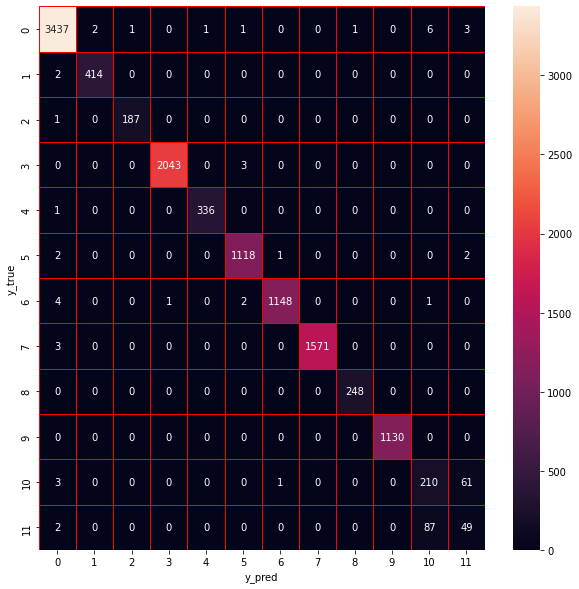

In [159]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [160]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 0.9951923076923077
Accuracy of SVM: 0.0005815644082581839


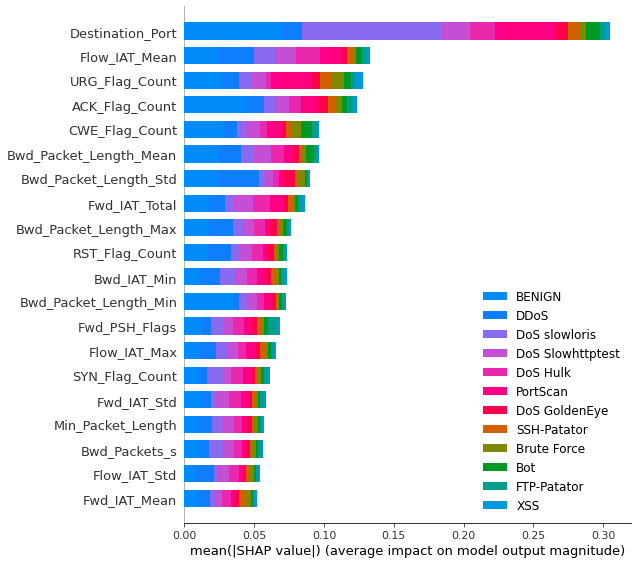

In [179]:
shap.initjs()
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation
shap.summary_plot(shap_values, pd.DataFrame(x_train), feature_names= features, class_names= attack)